## Regresion
Uno de los métodos más simples que se tienen en Machine Learning serían las regresiones lineales. Aunque las regresiones lineales nos puedan sonar a estadística, lo cierto es que son un modelo explicativo entre la variable de entrada x y la variable de salida y. Obviamente x puede ser una matriz o multiples variables independientes.

In [1]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


Construimos nuestros propios datos

In [17]:
# Poner una semilla 
np.random.seed(1)

x = np.linspace(1, 20, 30)
# print(x)

y = x**2
# print(y)
y = y + np.random.normal(0, 4, len(x))**2

# # transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

Representación de los datos

Text(0, 0.5, 'Y')

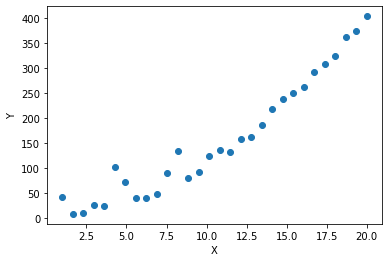

In [20]:
f,ax = plt.subplots()
ax.plot(x, y, 'o')

ax.set_xlabel("X")
ax.set_ylabel("Y")

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


Ajuste del modelo

In [90]:
# Polinomio de orden n
polynomial_features = PolynomialFeatures(degree=2) # Funcion para transformar los features

# Transformamos Train
X_train_poly = polynomial_features.fit_transform(X_train)

# Importamos el modelo
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train_poly, y_train)

# Prediccion sobre Train
y_train_est = model.predict(X_train_poly)

# ###########################################
#sort_axis = operator.itemgetter(0)
#sorted_zip = sorted(zip(X_train, y_poly_pred), key=sort_axis)
#xsorted, y_poly_pred = zip(*sorted_zip)

# plt.plot(xsorted, y_poly_pred, color='m')
# plt.show()

# Predicción sobre Test
X_test_poly = polynomial_features.fit_transform(X_test)

# Prediccion sobre Test
y_test_est = model.predict(X_test_poly)


# Errores cuadráticos
RMSE = np.mean((y_train_est - y_train)**2)
print("Train error RMSE: " + str(RMSE))


# ###################################################
# # x_poly_test = polynomial_features.fit_transform(X_test)
RMSE2 = np.mean((y_test_est - y_test)**2)
print("Test error RMSE: " + str(RMSE2))


Train error RMSE: 326.8785569016826
Test error RMSE: 492.69391621908625


Text(0, 0.5, 'Y')

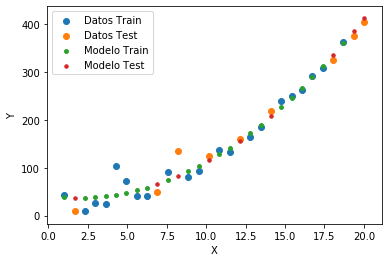

In [91]:
f,ax = plt.subplots()
ax.scatter(X_train, y_train, label="Datos Train")
ax.scatter(X_test, y_test, label="Datos Test")
ax.scatter(X_train, y_train_est, label="Modelo Train", s=15) 
ax.scatter(X_test, y_test_est, label="Modelo Test", s=12)

ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("Y")

# Train-Test division
En primer lugar importamos los datos. Como ejemplo vamos a utilizar una base de datos de sklearn. El modelo de clasificación que utilizamos va a ser el de una regresión lineal


Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

Number of Attributes: First 10 columns are numeric predictive values

Target:	Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information:
 	
Age, Sex, Body mass index, Average blood pressure, S1, S2, S3, S4, S5, S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1). Source URL: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

##  Librerias

In [92]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Load Data

In [93]:
diabetes = datasets.load_diabetes() # Dataset diabetes

In [98]:
#diabetes["data"][0]

In [99]:
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Nombres de las columnas
# # Ponemos datos como df e y
X = pd.DataFrame(diabetes.data, columns = columns)
y = diabetes.target

# Modelo
Las regresiones lineales son un modelo explicativo entre la variable de entrada x y la variable de salida y. x puede ser una matriz o multiples variables independientes.

In [105]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#print(X_train.shape, y_train.shape)


In [110]:
#y_test

In [111]:
# Ajustamos el modelo
lm = linear_model.LinearRegression() # modelo
model = lm.fit(X_train, y_train) # Entrenamos con Train
predictions = lm.predict(X_test) # Predecimos sobre Test

In [116]:
#predictions

In [115]:
print(np.round(predictions))

[ 82. 145.  84. 190. 106. 119.  61. 247.  79. 158. 151. 133. 116. 160.
 169. 145. 104.  49. 101. 108. 176. 146. 169.  85. 183. 159.  50. 212.
  79. 259. 188. 146.  73. 123. 180. 230. 145. 262. 232.  64. 209. 158.
 233. 117. 117. 200.  85. 218. 212. 187. 147. 236. 137.  52. 223. 178.
 178. 139. 119. 246. 210. 100.  70. 131. 130. 188. 184. 157. 212.  78.
 169. 108. 190. 197. 120. 123. 196. 114. 200. 128. 121.  68. 254. 278.
 147. 111. 167. 267. 183.]


Text(0, 0.5, 'Predictions Test')

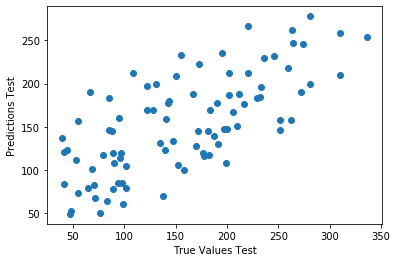

In [118]:
## Representación del error en Test
plt.scatter(y_test, np.round(predictions))
plt.xlabel("True Values Test")
plt.ylabel("Predictions Test")

# Metrica de error R^2

In [119]:
print("Score en train:", model.score(X_train, y_train))
print("Score en test:", model.score(X_test, y_test))

Score en train: 0.5184161424606726
Score en test: 0.49318112858613283


## Cross validation

In [120]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [127]:
# Realizamos un CV a mano
X_v1, X_v2, y_v1, y_v2 = train_test_split(X_train, y_train, test_size=0.5)
model1 = lm.fit(X_v1, y_v1)
print("Score1:", model1.score(X_v2, y_v2))

model2 = lm.fit(X_v2, y_v2)
print("Score2:", model2.score(X_v1, y_v1))

Score1: 0.4955146547218018
Score2: 0.45336620451618226


In [139]:
# Cross validation
# Construimos el modelo e indicamos los datos con los que se va entrenar
lm = linear_model.LinearRegression()

# scores = cross_val_score(lm, X_train, y_train, cv=7)
scores = cross_val_score(lm, X_train, y_train, cv=KFold(3, shuffle=True))

print("Cross-validated scores:", scores)
print("Cross-validated mean scores:", np.mean(scores))


NameError: name 'KFold' is not defined

In [143]:
scores.

True